In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# KINETICS
***
$\mathbf{\text{Micro Kinetic Model for (a Simple 4-Step Mechanism) CO Oxidation}}:$<br>
#### [Link to Relevant Paper](https://pubs.acs.org/doi/10.1021/cs500377j) 
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
$Ea = 80kJ{mol}^{-1}->120kJ{mol}^{-1}$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO / Desorption of CO*

$$ CO(g) + * \rightleftharpoons CO^{*} $$  <br> 

Reaction 2:&emsp;Adsorption of $O_2$ / Desorption of $O_2^*$

$$ {O_2}(g) + * \rightleftharpoons {O_2}^{*} $$  <br> 

Reaction 3:&emsp;Dissociation of ${O_2}^*$ / Recombination of O*

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$  <br> 

Reaction 4:&emsp;Surface Reaction of CO* and ${O_2}^*$ / Adsorption of $CO_2$

$$ {CO}^{*} + {O}^{*} \rightleftharpoons {{CO}_2}(g) + 2* $$  <br> 

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix}
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{A_{i,j}} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{A_{i,j}}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



# REACTOR MODELLING
***

In [2]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Pipe-PFR.svg/464px-Pipe-PFR.svg.png?20081128031804')

In [3]:
Image(url='http://websites.umich.edu/~elements/asyLearn/bits/pfrfinal/lec1-9.gif')

$$ \left[ \text{Rate of flow In} \right] - \left[ \text{Rate of flow Out} \right] + \left[\text{Rate of Generation}\right]  = \left[\text{Rate of Accumulation}\right] $$

$$ F_{A0} - F_{A} + \int_{0}^{V} r_A \,dV = \frac{dN_A}{dt} $$

Note -> Assume Steady State:

$$\frac{dN_A}{dt} = 0 $$
Therefore, 
$$F_{A0} - F_{A} + \int_{0}^{V} r_A \,dV = 0$$

In [18]:
from main import *
MKM = MKModel('Atomic.csv','Stoich.csv','Param.csv') #Defining the Model
MKM.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM.set_limits_of_integration(Ti=0,Tf=1e5)#Sets the reange of time used in integration
MKM.rtol = 1e-8
MKM.abstol = 1e-8

Mass is conserved. 



In [19]:
def sol(V,F):
    
#     F = F[0] #Theta_CO 
    FA0 = 0.01
    sum_reactant_coefficients = 2
    R1 = 1.987
    
    
    T0 = 438
    E = 20
    deltaH = -7300
    Cp = 67    
#     A = 1.2*10**19    
    T = T0-(deltaH/Cp)*((F - FA0)/FA0)
    A = [100,100,100,100,100,100,100,100]
    
#     MKM.k[0] = A*math.exp(-E*1000/(R1*T))
    for i in np.arange(len(MKM.k)-1):
        MKM.k[i] = A[i]*math.exp(-E/(R1*T))
    
    
#     ra = MKM.get_SS_rates_production()[0] 
    ra = MKM.k[0] * (F/V)**2
    D = ra/V
    
    D = np.transpose(D)
    return D

In [20]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize

def Kinetics(init,Vol,Teval=None):
    V_span = (Vol[0], Vol[-1])
    solve = solve_ivp(sol,V_span,init,method='BDF', t_eval=Teval, rtol = 1E-5,atol = 1E-5)
    solv = np.transpose(solve.y)
    vols = np.transpose(solve.t)
    #print(k)
    return vols, solv

In [21]:
%%time
Vol =np.linspace(0.01, 100, num=20)
init = [0.1]
Vols , Soln = Kinetics(init,Vol)

CPU times: user 112 ms, sys: 4.25 ms, total: 116 ms
Wall time: 118 ms


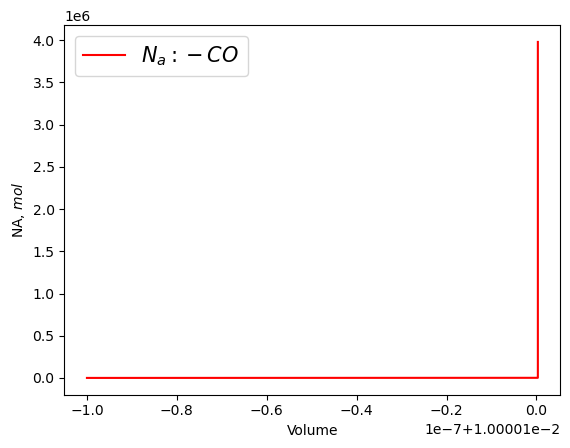

In [22]:
plt.figure(1)
plt.plot(Vols, Soln,'r-', label=r'$N_a :- CO$')
plt.xlabel('Volume')
plt.ylabel("NA, $mol$")
plt.legend(fontsize=15, loc='best')
plt.show()


In [23]:
def get_ODEs(t,cov,coverage=True): #t only placed for solve_ivp purposes #Functions used for calculating the rates of production
                            #coverage flag True if excluding the rate of production of gas species
    if coverage == False:  
        cov = cov[len(MKM.P):]
        
    r = MKM.get_rates(cov)

    Nr = len(MKM.Stoich) #Number of rows in your your stoich matrix, i.e (Number of reactions)
    Ns = len(MKM.Stoich.iloc[0,1:]) #Number of species *****
    D = []      #Empty Vector For holding rate of change of coverage values
    #Differential Equations to calculate the rate of change in coverages
    for i in np.arange(Ns):
        dsum=0
        for j in np.arange(Nr):

            dsum += float(MKM.Stoich.iloc[j,i+1])*r[j] #Calculating the rate of production of a species i

        D.append(dsum)    

    D = np.transpose(D)    
    if coverage==True:    
        return D[len(MKM.P):]
    else:
        return D

In [29]:
import scipy.optimize

def f(cov):
  return get_ODEs(10000,cov,coverage=False)

x0 = [1,1,1,1,1,1,1]

solution = scipy.optimize.fsolve(f, x0)

print(solution)

[ 1.32559349e+06  1.22732184e+06  2.95053587e+06  9.20465492e-14
 -1.74903433e-09  9.20455370e-14  9.20436719e-06]


/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [25]:
def f(cov):
  return MKM.get_ODEs(0,cov,coverage=True)

x0 = [1,1,1,1]

solution = scipy.optimize.fsolve(f, x0)
print(solution)

[4.60987156e-07 9.67749816e-04 2.45191165e-07 2.93951732e+00]


<IPython.core.display.Javascript object>


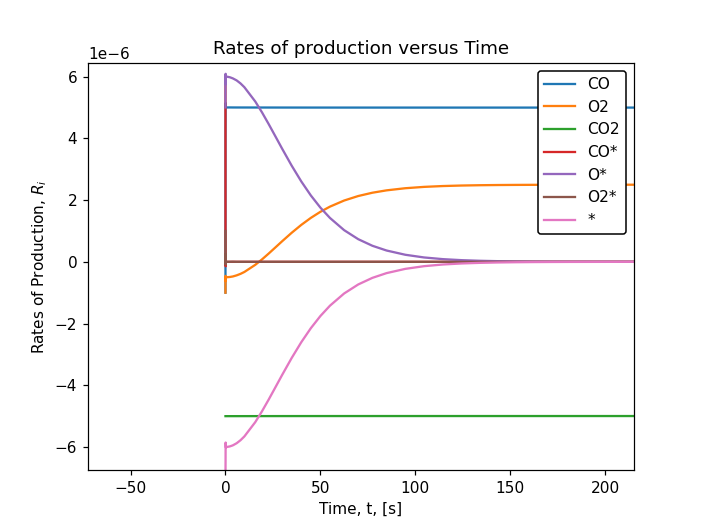

In [28]:
%matplotlib notebook
a,b = MKM.solve_rate_production(plot = True)